# Ad Campaign

## 0 - Import 

In [1]:
import json
import calendar
import random
from datetime import date, timedelta
import faker
import numpy as np
from pandas import DataFrame
from delorean import parse
import pandas as pd
# make the graphs nicer
pd.set_option('display.mpl_style', 'default')

/Users/anna/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## 1 - Preparing the Data

In [2]:
# create the faker to populate the data
fake = faker.Faker()

In [3]:
usernames = set()
usernames_no = 1000

# populate the set with 1000 unique usernames
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())

In [4]:
def get_random_name_and_gender():
    skew = .6  # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'

get_random_name_and_gender()

('Nicole Haynes', 'F')

In [5]:
# for each username, create a complete user profile
# simulate user data coming from an API. It is a list
# of JSON strings (users).
def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90),
            'address': fake.address(),
        }
        users.append(json.dumps(user))
    return users

users = get_users(usernames)
users[:3] # check

['{"username": "jthompson", "name": "Karen Mayer", "gender": "F", "email": "matthew38@gmail.com", "age": 32, "address": "331 Bradley Junctions\\nNew Terriborough, NH 90405"}',
 '{"username": "sophia54", "name": "George Snyder", "gender": "M", "email": "qferguson@gmail.com", "age": 65, "address": "PSC 4346, Box 9905\\nAPO AA 39380"}',
 '{"username": "carljackson", "name": "Kathryn Dawson", "gender": "F", "email": "bryan81@green-johnson.com", "age": 50, "address": "01984 Sullivan Point Suite 379\\nWest Calvin, KS 41477-2910"}']

In [6]:
# campaign name format:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency
def get_type():
    # just some gibberish internal codes
    types = ['CPM', 'CPP', 'CPA']
    return random.choice(types)

get_type() #check

'CPM'

In [7]:
def get_start_end_dates():
    duration = random.randint(1, 2 * 365)
    offset = random.randint(-365, 365)
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    
    return _format_date(start), _format_date(end)

get_start_end_dates() #check

('20170714', '20190201')

In [8]:
def get_age():
    age = random.randint(20, 45)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff % 5
    return '{}-{}'.format(age, age + diff)

get_age() #check

'35-45'

In [9]:
def get_gender():
    return random.choice(('M', 'F', 'B'))

get_gender() #check

'B'

In [10]:
def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

get_currency() #check

'USD'

In [11]:
def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join(
        (type_, start_end, age, gender, currency))

get_campaign_name() #check

'CPM_20181026_20181107_40-60_B_GBP'

In [12]:
# campaign data:
# name, budget, spent, clicks, impressions
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6)
    spent = random.randint(10**2, budget)    
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))    
    impressions = int(random.gauss(0.5 * 10**6, 2))
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

get_campaign_data() #check

{'cmp_bgt': 835291,
 'cmp_clicks': 20260,
 'cmp_impr': 499998,
 'cmp_name': 'CPM_20181016_20190919_20-35_B_EUR',
 'cmp_spent': 664293}

In [13]:
# assemble the logic to get the final version of the rough data
# data will be a list of dictionaries. Each dictionary will follow
# this structure:
# {'user': user_json, 'campaigns': [c1, c2, ...]}
# where user_json is the JSON string version of a user data dict
# and c1, c2, ... are campaign dicts as returned by
# get_campaign_data

def get_data(users):
    data = []
    for user in users:
        campaigns = [get_campaign_data()
                     for _ in range(random.randint(2, 8))]
        data.append({'user': user, 'campaigns': campaigns})
    return data

get_data(users)[0] #check

{'campaigns': [{'cmp_bgt': 897275,
   'cmp_clicks': 26028,
   'cmp_impr': 500000,
   'cmp_name': 'CPM_20170509_20170830_35-60_M_EUR',
   'cmp_spent': 746077},
  {'cmp_bgt': 545330,
   'cmp_clicks': 23402,
   'cmp_impr': 499999,
   'cmp_name': 'CPA_20180723_20200721_45-65_B_USD',
   'cmp_spent': 503218},
  {'cmp_bgt': 167717,
   'cmp_clicks': 44547,
   'cmp_impr': 499995,
   'cmp_name': 'CPM_20170903_20180417_25-40_B_EUR',
   'cmp_spent': 51692},
  {'cmp_bgt': 308163,
   'cmp_clicks': 36029,
   'cmp_impr': 500001,
   'cmp_name': 'CPA_20180406_20180707_35-50_B_USD',
   'cmp_spent': 116438},
  {'cmp_bgt': 135919,
   'cmp_clicks': 69201,
   'cmp_impr': 499997,
   'cmp_name': 'CPA_20170219_20180725_40-50_M_GBP',
   'cmp_spent': 118649},
  {'cmp_bgt': 382381,
   'cmp_clicks': 36820,
   'cmp_impr': 500001,
   'cmp_name': 'CPA_20161221_20181211_30-45_F_USD',
   'cmp_spent': 231580},
  {'cmp_bgt': 634362,
   'cmp_clicks': 28934,
   'cmp_impr': 499997,
   'cmp_name': 'CPP_20170111_20170507_20-35

## 2 - Cleaning the data

In [14]:
# fetch simulated rough data
rough_data = get_data(users)

rough_data[:2]  # let's take a look

[{'campaigns': [{'cmp_bgt': 646237,
    'cmp_clicks': 63363,
    'cmp_impr': 500001,
    'cmp_name': 'CPA_20180419_20181221_30-50_M_EUR',
    'cmp_spent': 136661},
   {'cmp_bgt': 864235,
    'cmp_clicks': 34174,
    'cmp_impr': 499996,
    'cmp_name': 'CPM_20171015_20181128_25-45_M_USD',
    'cmp_spent': 442828},
   {'cmp_bgt': 533154,
    'cmp_clicks': 18663,
    'cmp_impr': 499999,
    'cmp_name': 'CPM_20180427_20180519_40-60_B_EUR',
    'cmp_spent': 184420},
   {'cmp_bgt': 576772,
    'cmp_clicks': 28490,
    'cmp_impr': 500003,
    'cmp_name': 'CPM_20171201_20190423_45-70_B_USD',
    'cmp_spent': 269645},
   {'cmp_bgt': 810482,
    'cmp_clicks': 56923,
    'cmp_impr': 500002,
    'cmp_name': 'CPM_20170824_20180620_20-35_B_EUR',
    'cmp_spent': 773578},
   {'cmp_bgt': 564536,
    'cmp_clicks': 66392,
    'cmp_impr': 499999,
    'cmp_name': 'CPP_20180914_20190912_35-50_F_USD',
    'cmp_spent': 486116},
   {'cmp_bgt': 29053,
    'cmp_clicks': 32926,
    'cmp_impr': 499996,
    'cmp_n

In [15]:
# Let's start from having a different version of the data
# I want a list whose items will be dicts. Each dict is 
# the original campaign dict plus the user JSON

data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
data[:2]  # let's take another peek

[{'cmp_bgt': 646237,
  'cmp_clicks': 63363,
  'cmp_impr': 500001,
  'cmp_name': 'CPA_20180419_20181221_30-50_M_EUR',
  'cmp_spent': 136661,
  'user': '{"username": "jthompson", "name": "Karen Mayer", "gender": "F", "email": "matthew38@gmail.com", "age": 32, "address": "331 Bradley Junctions\\nNew Terriborough, NH 90405"}'},
 {'cmp_bgt': 864235,
  'cmp_clicks': 34174,
  'cmp_impr': 499996,
  'cmp_name': 'CPM_20171015_20181128_25-45_M_USD',
  'cmp_spent': 442828,
  'user': '{"username": "jthompson", "name": "Karen Mayer", "gender": "F", "email": "matthew38@gmail.com", "age": 32, "address": "331 Bradley Junctions\\nNew Terriborough, NH 90405"}'}]

### Creating the DataFrame

In [16]:
# data is good enough for creating an initial DataFrame
df = DataFrame(data)

# let's take a look at the first 5 rows
df.head()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,646237,63363,500001,CPA_20180419_20181221_30-50_M_EUR,136661,"{""username"": ""jthompson"", ""name"": ""Karen Mayer..."
1,864235,34174,499996,CPM_20171015_20181128_25-45_M_USD,442828,"{""username"": ""jthompson"", ""name"": ""Karen Mayer..."
2,533154,18663,499999,CPM_20180427_20180519_40-60_B_EUR,184420,"{""username"": ""jthompson"", ""name"": ""Karen Mayer..."
3,576772,28490,500003,CPM_20171201_20190423_45-70_B_USD,269645,"{""username"": ""jthompson"", ""name"": ""Karen Mayer..."
4,810482,56923,500002,CPM_20170824_20180620_20-35_B_EUR,773578,"{""username"": ""jthompson"", ""name"": ""Karen Mayer..."


In [17]:
# let's get a sense of how many rows there are and what is
# their structure.
df.count()

cmp_bgt       5023
cmp_clicks    5023
cmp_impr      5023
cmp_name      5023
cmp_spent     5023
user          5023
dtype: int64

In [18]:
df.describe()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_spent
count,5023.000000,5023.000000,5023.000000,5023.000000
mean,509543.082023,40008.977304,499999.508461,254789.380052
std,288744.410084,21450.824048,2.000766,222649.688020
min,1246.000000,639.000000,499993.000000,126.000000
25%,261080.500000,22580.500000,499998.000000,69295.500000
50%,515663.000000,36965.000000,500000.000000,195029.000000
75%,759700.500000,55266.500000,500001.000000,391621.500000
max,999370.000000,99335.000000,500007.000000,988815.000000


In [19]:
# let's see which are the top and bottom 3 campaigns according
# to budget (regardless of the currency)
df.sort_index(by=['cmp_bgt'], ascending=False).head(3)

/Users/anna/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
4075,999370,71718,499999,CPA_20180921_20181217_20-35_B_GBP,2739,"{""username"": ""ellisjeanne"", ""name"": ""Julie Smi..."
1679,999250,46824,499997,CPM_20180516_20180928_30-40_M_USD,784811,"{""username"": ""margaretvargas"", ""name"": ""Michel..."
37,998185,13864,499998,CPM_20180113_20190808_35-40_B_USD,522415,"{""username"": ""willie35"", ""name"": ""Daniel Vance..."


In [20]:
df.sort_index(by=['cmp_bgt'], ascending=False).tail(3)

/Users/anna/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
2606,1373,64897,500002,CPM_20180425_20190205_20-40_B_GBP,1043,"{""username"": ""brenda02"", ""name"": ""Timothy Hern..."
2312,1253,17999,500000,CPP_20170108_20171026_40-50_B_EUR,738,"{""username"": ""erin41"", ""name"": ""Terri Stewart""..."
953,1246,26871,499999,CPA_20180218_20180425_25-35_B_GBP,638,"{""username"": ""ssmith"", ""name"": ""Tamara Fernand..."


## 3 - Manipulating the DataFrame

In [21]:
# first, let's explode cmp_name into its components
# and get a separate DataFrame for those

def unpack_campaign_name(name):
    # very optimistic method, assumes data in campaign name
    # is always in good state
    type_, start, end, age, gender, currency = name.split('_')
    start = parse(start).date
    end = parse(end).date
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(
    campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,CPA,2018-04-19,2018-12-21,30-50,M,EUR
1,CPM,2017-10-15,2018-11-28,25-45,M,USD
2,CPM,2018-04-27,2018-05-19,40-60,B,EUR


In [22]:
# let's join the two dataframes
df = df.join(campaign_df)

In [23]:
# and take a look  
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,CPA_20180419_20181221_30-50_M_EUR,CPA,2018-04-19,2018-12-21,30-50,M,EUR
1,CPM_20171015_20181128_25-45_M_USD,CPM,2017-10-15,2018-11-28,25-45,M,USD
2,CPM_20180427_20180519_40-60_B_EUR,CPM,2018-04-27,2018-05-19,40-60,B,EUR


In [24]:
# now let's do the same for the JSON user object

def unpack_user_json(user):
    # very optimistic as well, expects user objects
    # to have all attributes
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(
    user_data.tolist(), columns=user_cols, index=df.index)

In [25]:
# let's join the two dataframes
df = df.join(user_df)

In [26]:
# and take a look
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""jthompson"", ""name"": ""Karen Mayer...",jthompson,matthew38@gmail.com,Karen Mayer,F,32,"331 Bradley Junctions\nNew Terriborough, NH 90405"
1,"{""username"": ""jthompson"", ""name"": ""Karen Mayer...",jthompson,matthew38@gmail.com,Karen Mayer,F,32,"331 Bradley Junctions\nNew Terriborough, NH 90405"


In [27]:
# now we have the DataFrame completely expanded
# fix the column names
better_columns = [
    'Budget', 'Clicks', 'Impressions',
    'cmp_name', 'Spent', 'user',
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
df.columns = better_columns

In [28]:
# add three other columns
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
    
calculate_extra_columns(df)

In [29]:
# take a look
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,136661,63363,500001,0.126726,2.156795,0.273321
1,442828,34174,499996,0.068349,12.958038,0.885663
2,184420,18663,499999,0.037326,9.881584,0.368841


In [30]:
# let's take the values of the first row and verify
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]

CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]

print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.126725746549 0.126725746549
CPC: 2.15679497499 2.15679497499
CPI: 0.273321453357 0.273321453357


In [31]:
# let's also add the name of the Day when campaign starts
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]

def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)

In [32]:
# let's verify
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2018-04-19,2018-12-21,246,Thursday
1,2017-10-15,2018-11-28,409,Sunday
2,2018-04-27,2018-05-19,22,Friday


In [33]:
# now let's get rid of the cmp_name and user columns,
# which we don't need any more, and address too
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
    'Name', 'Gender', 'Age'
]
df = df[final_columns]

## 4 - Saving to a file in different formats

In [34]:
# CSV format
df.to_csv('df.csv')

In [35]:
# JSON format
# df.to_json('df.json')

In [36]:
# Spreadsheet format
# df.to_excel('df.xls')

## 5 - Visualizing results

First let's take care of the graphics, we need to instruct the notebook to use matplotlib inline and the serif font family.

In [37]:
%matplotlib inline

In [38]:
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

In [39]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000
mean,372.288672,509543.082023,40008.977304,499999.508461,254789.380052,0.080018,10.051271,0.509579,53.049572
std,248.165762,288744.410084,21450.824048,2.000766,222649.688020,0.042902,17.939814,0.445300,21.661403
min,-329.000000,1246.000000,639.000000,499993.000000,126.000000,0.001278,0.003453,0.000252,18.000000
25%,186.000000,261080.500000,22580.500000,499998.000000,69295.500000,0.045161,1.822182,0.138591,34.000000
50%,373.000000,515663.000000,36965.000000,500000.000000,195029.000000,0.073930,5.345242,0.390058,52.000000
75%,561.000000,759700.500000,55266.500000,500001.000000,391621.500000,0.110533,11.809845,0.783244,72.000000
max,1046.000000,999370.000000,99335.000000,500007.000000,988815.000000,0.198670,398.096520,1.977618,90.000000


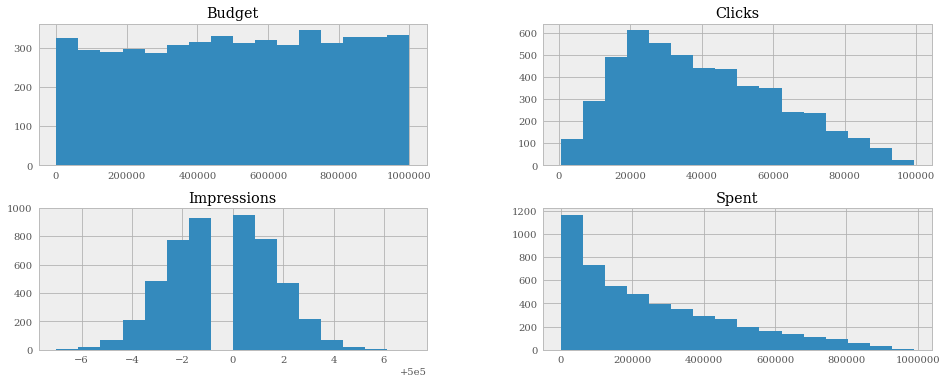

In [40]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));

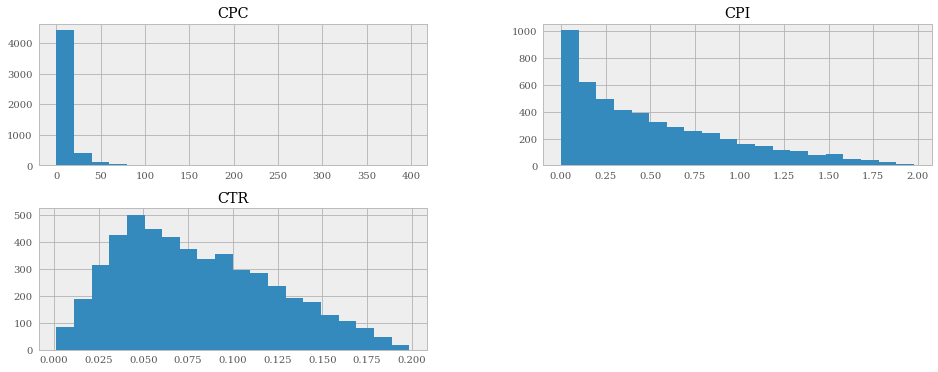

In [41]:
df[['CTR', 'CPC', 'CPI']].hist(bins=20, figsize=(16, 6));

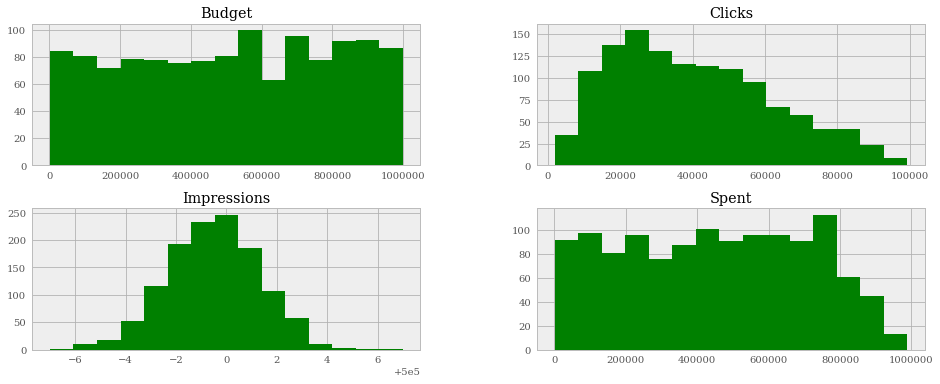

In [42]:
# let's see the campaigns whose spent is > than 75% of the budget
mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=15, figsize=(16, 6), color='g');

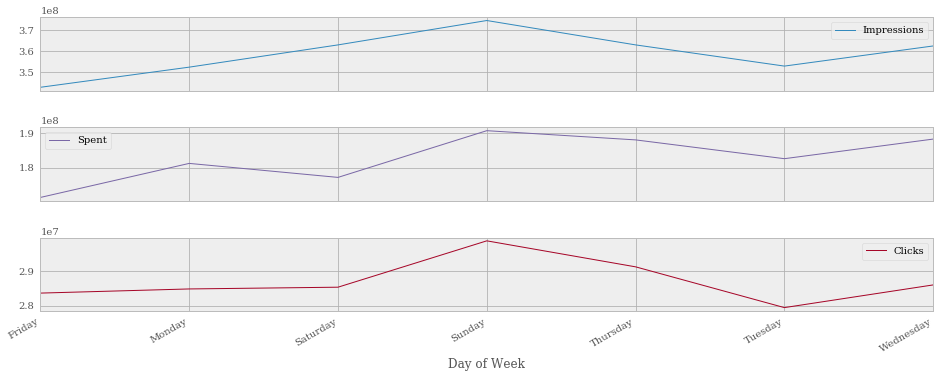

In [43]:
# Let's aggregate per Day of the Week
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
    figsize=(16, 6), subplots=True);

In [44]:
# Let's aggregate per gender
agg_config = {
    'Impressions': {
        'Mean Impr': 'mean',
        'Std Impr': 'std',
    },
    'Spent': ['mean', 'std'],
}

df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

Impressions             Spent               
                           Mean Impr  Std Impr    mean            std
Target Gender Target Age                                             
B             20-25           499999  1.942088  238830  204433.925145
              20-30           499999  2.024288  286402  247419.481348
              20-35           499999  1.896235  269008  228855.152345
              20-40           499999  1.949235  259053  229804.177081
              20-45           499999  2.844452  181886  187776.416799
              25-30           499999  2.061501  227948  194842.394628
              25-35           499999  1.981537  248118  236515.364980
              25-40           499999  2.087542  235492  196347.167667
              25-45           499998  1.624924  224957  209094.582896
              25-50           499999  1.519109  224839  215368.609223
              30-35           499999  1.633605  260095  254658.854519
              30-40           499999  1.849419  214048  198636.590104
              30-45           499999  1.860609  228176  193917.776220
              30-50           499999  2.188766  254674  241663.643562
              30-55           500000  1.768945  134680  110022.499068
              35-40           499999  1.954400  236064  238528.381778
              35-45           499999  1.830467  202621  205543.949901
              35-50           500000  1.799529  272159  210151.444220
              35-55           499999  2.096828  243810  201570.597607
              35-60           500000  2.148871  276523  217944.145215
              40-45           499999  1.931967  249306  222829.017703
              40-50           499999  2.041727  242879  220991.481592
              40-55           499999  2.132655  234678  229435.740438
              40-60           499999  2.004889  283646  223294.330594
              40-65           499998  1.804036  163384  202004.870336
              45-50           499999  2.715695  292130  214051.066529
              45-55           500000  1.772811  297306  187310.295423
              45-60           500000  1.756408  198771  151140.556672
              45-65           499999  1.452546  377008  312336.658967
              45-70           500001  2.645751  195065  126066.355528
...                              ...       ...     ...            ...
M             20-25           499999  1.952130  167887  158608.156904
              20-30           499999  1.939553  285658  253345.202462
              20-35           499999  2.201719  233174  214109.256560
              20-40           499999  2.095744  268030  231741.544765
              20-45           500000  2.042408  260649  184857.335041
              25-30           499999  1.757558  261995  232011.247578
              25-35           499999  2.043347  237139  198426.724275
              25-40           499999  2.099920  256447  269408.020302
              25-45           499999  1.843127  249533  237966.000843
              25-50           499999  2.093407  242027  194587.233711
              30-35           499999  1.955428  245002  210085.746924
              30-40           499999  1.978971  280585  214438.530113
              30-45           499999  2.059060  286462  249455.072973
              30-50           499999  1.921711  278870  220948.992479
              30-55           499999  1.691892  239942  252508.572788
              35-40           499999  2.075164  237429  209796.382440
              35-45           499999  2.026174  255613  207762.076143
              35-50           499999  2.012036  294904  229112.950301
              35-55           499999  1.880042  224029  220276.468922
              35-60           499999  2.624669  367621  301779.770327
              40-45           499999  2.049290  285881  216178.634103
              40-50           499999  2.068606  252209  253846.216448
              40-55           499999  2.003598  287783  199782.355128
              40-60           49999

In [45]:
# finally, let's make a pivot table
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Impressions                       Clicks                    \
Target Gender           B         F         M        B        F        M   
Target Age                                                                 
20-25            44499961  36999927  37499955  3515505  2901502  3430934   
20-30            36999992  36999967  39999975  3117846  3313570  2953678   
20-35            36999962  41999961  37499964  2785969  3224318  2722895   
20-40            36999989  40499949  43499955  3081428  3285446  3147088   
20-45             5499990   7999997   7500003   534272   658597   683121   
25-30            34499978  29499955  37499966  2998019  2511848  2663368   
25-35            43499959  40499975  39499958  3558087  3117977  3526380   
25-40            36999945  34999950  36999991  2985485  2805939  2708036   
25-45            39499919  32999953  37499986  3163758  2902590  3027008   
25-50             6499998   7999996   8999991   423195   575460   749909   
30-35            38999962  36499945  40999967  3303153  2778316  3076709   
30-40            37999968  41499951  33499946  2894280  3417279  2621466   
30-45            39999941  37499964  36499972  3220578  2944874  3065763   
30-50            42999952  48999979  37499973  3380936  4023271  3032651   
30-55             8000001   8000007   7999985   607212   707108   649341   
35-40            38999937  39999970  37499975  2929745  3229379  2778688   
35-45            36999946  40499957  34999969  3019656  2985735  2921576   
35-50            43000008  42999952  33999950  3465064  3308504  2581227   
35-55            34999962  34499957  50999933  2771488  2998417  4561602   
35-60             8500011  11499992   4999990   723331   782408   516836   
40-45            36499974  41999954  38499959  2812867  3091676  3312196   
40-50            37499958  37999979  39499973  2824866  3201408  2913550   
40-55            29499978  28999943  29999997  2337918  2213075  2563939   
40-60            32999958  40499954  38499969  2742946  3308517  3299339   
40-65             5499985  10999981   9999991   452574   751125   748755   
45-50             8499983   8999979   5499998   593504   739419   445748   
45-55             3500006  10999996   6999989   250102   848061   589706   
45-60             9000008  12499965  10499991   782767   980371   855240   
45-65             6999992   6999996   8999980   498510   482146   760267   
45-70             1500003    500001    500002   102217    24371    68092   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          21255900  17823270  12591538  
20-30          21193767  19498398  22852653  
20-35          19906635  21686905  17488076  
20-40          19169929  19127458  23318628  
20-45           2000756   3351053   3909738  
25-30          15728473  14423859  19649690  
25-35          21586301  24061329  18734018  
25-40          17426456  20494211  18977087  
25-45          17771640  16538376  18715001  
25-50           2922907   4130443   4356486  
30-35          20287475  17674051  20090214  
30-40          16267664  28708005  18799210  
30-45          18254158  20800293  20911751  
30-50          21902033  28667080  20915275  
30-55           2154892   3266156   3839081  
35-40          18413008  18826912  17807220  
35-45          14994024  20836111  17892964  
35-50          23405753  20555874  20053502  
35-55          17066755  17532555  22851009  
35-60           4700904   6308823   3676213  
40-45          18199392  20826534  22012893  
40-50          18215984  19443513  19924523  
40-55          13846013  16641174  17267033  
40-60          18720650  21168759  18306498  
40-65           1797232   5390074   6394515  
45-50           4966220   4327235   3102045  
45-55           2081148   7833667   3003063  
45-60           3577891   5039977   5694635  
45-65           5278114   2639272   4683322  
45-70            585195    260163